Step 1 – Data Preparation<p>
Load the dataset in Python (Pandas or equivalent). <p>
Clean the text:<p>
Remove HTML tags, punctuation, and numbers<p>
Convert to lowercase<p>
Remove stopwords (NLTK or SpaCy)<p>
Split into train (80%) and test (20%) sets.

In [1]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving used as train_data (1).csv to used as train_data (1).csv


Start : Step 1 – Data Preparation



In [2]:


# Install required libraries
!pip install pandas numpy scikit-learn nltk

# Import libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from google.colab import files

# Download stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:

# Load the dataset in Python (Pandas )
df = pd.read_csv("used as train_data (1).csv")

print("Missing values in the dataset:")

# Check for missing values
print(df.isnull().sum())

Missing values in the dataset:
0    0
1    0
dtype: int64


In [4]:
 # Rename columns
df.columns = ['Reviews', 'Sentiments']


In [5]:
# text cleaning function
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', str(text))
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)



In [6]:
# Apply cleaning to 'Reviews' column
df['Reviews'] = df['Reviews'].apply(clean_text)

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Sentiments'], test_size=0.2,random_state=42)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

# Save cleaned and rename dataset as a new CSV file
df.to_csv("used as train_data (1)_Cleaned.csv", index=False)
print(" Cleaned, renamed dataset and processed dataset saved as 'used as train_data (1)_Cleaned.csv'")

#  if you want to see new cleaned csv then run this line code(just removw the hash (#)). It will Download new cleaned CSV
#files.download("used as train_data (1)_Cleaned.csv")


Training size: (20000,)
Testing size: (5000,)
 Cleaned, renamed dataset and processed dataset saved as 'used as train_data (1)_Cleaned.csv'


End: Step 1 – Data Preparation<p>
........................................................................

Step 2 – Model Training<p>

Use Logistic Regression, Naive Bayes, or any ML model for classification.<p>
Convert text to features using TF-IDF or Word Embeddings.<p>
Train and evaluate the model on the test set.<p>
..............................................................................

Start : Step 2 – Model Training

In [7]:
# required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [8]:
# this was used for fine tunning (not required)
# TF-IDF Vectorization
#vectorizer = TfidfVectorizer(max_features=5000)
#X_train_tfidf = vectorizer.fit_transform(X_train)
#X_test_tfidf = vectorizer.transform(X_test)



In [9]:


#  TF-IDF with n-grams
vectorizer = TfidfVectorizer(max_features=60000, ngram_range=(1,2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)




# --- TF-IDF Vectorization ---
# We use TfidfVectorizer to convert text into numerical features.
# Parameters:
#   max_features=60000  -> Use only the top 60,000 most important words/phrases from the dataset.
#   ngram_range=(1,2)    -> Include both unigrams (single words) and bigrams (two-word combinations) as features.
#   stop_words='english' -> Remove common English stop words (e.g., "the", "is", "and") to reduce noise.

# The vectorizer learns the vocabulary and computes the TF-IDF weights for each word/ngram from the training data.
# - TF (Term Frequency): How often a term appears in a document.
# - IDF (Inverse Document Frequency): Gives higher weight to rare words and lower weight to frequent words.
# - TF-IDF score: TF × IDF (a measure of word importance in a document relative to the dataset).
#
# fit_transform(X_train):
#   - "fit" learns the vocabulary and IDF weights from the training data.
#   - "transform" converts the text into a sparse matrix of TF-IDF features.

# transform(X_test):
#   - Uses the already learned vocabulary/weights from training data to transform the test set (no fitting again).



In [10]:

# Classification Models
classification_models = {
    'Logistic Regression': LogisticRegression(max_iter=2500),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}


# Dictionary containing different classification models we want to test

# Logistic Regression: A linear model often used for binary classification.[max_iter=2500 increases the number of iterations to ensure convergence.].
# Naive Bayes: A probabilistic classifier based on Bayes' theorem.
# MultinomialNB is especially suitable for text classification with word counts or TF-IDF features.
# Decision Tree: A non-linear model that splits data based on feature values to make decisions.
# Random Forest: An ensemble method that builds multiple decision trees and averages their predictions for better accuracy.
# Support Vector Machine (SVM): A model that finds the best hyperplane to separate classes in high-dimensional space.
# Gradient Boosting: An ensemble model that builds trees sequentially, where each tree corrects errors from the previous one.

In [11]:
#  Hyperparameter grids for GridSearchCV

param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 0.5, 1], 'penalty': ['l2'], 'solver': ['lbfgs']},
    'Naive Bayes': {'alpha': [0.5, 1.0, 1.5]},  # smoothing parameter
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    'SVM': {'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf']},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
}

# Dictionary containing parameter grids for hyperparameter tuning of each model.
# These grids will be used in GridSearchCV to find the best model settings.

    # Logistic Regression:
    # 'C' controls the regularization strength (smaller values = stronger regularization).
    # 'penalty' specifies the type of regularization (L2 is common for numeric stability).
    # 'solver' is the optimization algorithm (lbfgs works well for small to medium datasets).

    # Naive Bayes:
    # 'alpha' is the smoothing parameter to handle zero probabilities in the data.

    # Decision Tree:
    # 'max_depth' limits how deep the tree can grow (None means unlimited depth).
    # 'min_samples_split' is the minimum number of samples required to split a node.

    # Random Forest:
    # 'n_estimators' is the number of decision trees in the forest.
    # 'max_depth' is the maximum depth of each tree (None means unlimited).
    # 'min_samples_split' sets the minimum number of samples to split an internal node.

    # Support Vector Machine (SVM):
    # 'C' controls the margin hardness (smaller C = wider margin, more regularization).
    # 'kernel' defines the function for projecting data into higher dimensions ('linear' or 'rbf').

    # Gradient Boosting:
    # 'n_estimators' is the number of boosting stages (trees) to run.
    # 'learning_rate' controls how much each tree contributes to the final prediction.
    # 'max_depth' limits the depth of each individual tree.



Training Accuracy for Logistic Regression: 0.8866, Training Accuracy for Naive Bayes: 0.8626, Training Accuracy for SVM: 0.8884.
so i will try to optimize this because this three  give me most prominent result. And I am not deleting others cause if any chance they will improve but i need more time to process all .

In [12]:
# Dictionary to store evaluation results for each model
model_reports = {}

# Loop through all classification models
for name, model in classification_models.items():
    print(f"\nTraining {name}...")

    # Fit the model on training data
    model.fit(X_train_tfidf, y_train)

    # Predict on training set
    y_pred_train = model.predict(X_train_tfidf)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_report = classification_report(y_train, y_pred_train, output_dict=True)

    # Predict on test set
    y_pred_test = model.predict(X_test_tfidf)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_report = classification_report(y_test, y_pred_test, output_dict=True)

    # Store both train and test metrics
    model_reports[name] = {
        "train_accuracy": train_acc,
        "train_classification_report": train_report,
        "train_predictions": y_pred_train,
        "test_accuracy": test_acc,
        "test_classification_report": test_report,
        "test_predictions": y_pred_test
    }

    # Print results
    print(f"Train Accuracy for {name}: {train_acc:.4f}")
    print(f"Test Accuracy for {name}: {test_acc:.4f}")
    print("Train Classification Report:")
    print(classification_report(y_train, y_pred_train))
    print("Test Classification Report:")
    print(classification_report(y_test, y_pred_test))



Training Logistic Regression...
Train Accuracy for Logistic Regression: 0.9427
Test Accuracy for Logistic Regression: 0.8904
Train Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9971
           1       0.94      0.95      0.94     10029

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2529
           1       0.87      0.91      0.89      2471

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000


Training Naive Bayes...
Train Accuracy for Naive Bayes: 0.9302
Test Accuracy for Naive Bayes: 0.8784
Train Classification Report:
              precision    recal

Start comparison - this is for comparison between all models,just see the best train and test result and algorithom result ( if do not want to see comparison then ignore it )

/tmp/ipython-input-1229696130.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=df_plot, palette=palette, edgecolor='black')


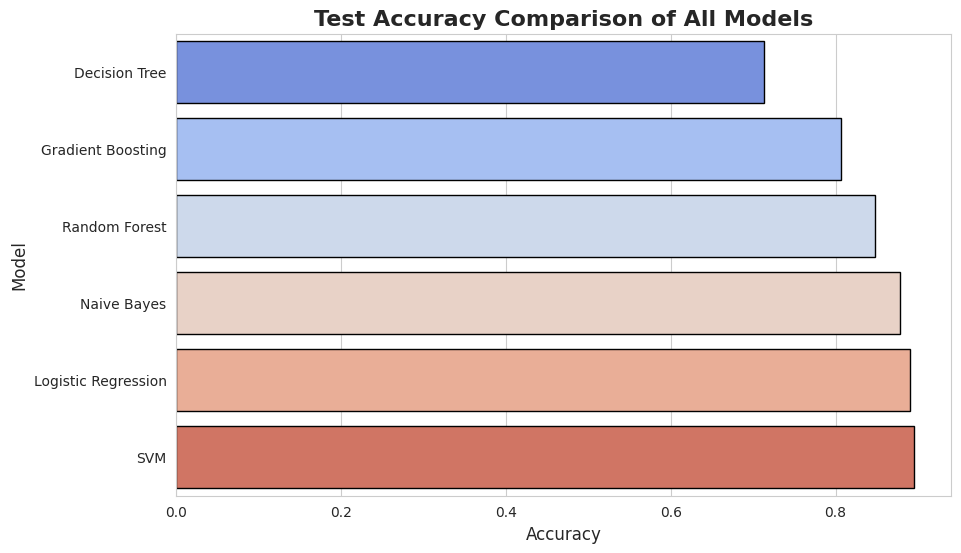

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Create DataFrame for plotting
# Extract model names and their corresponding accuracy scores from the `model_reports` dictionary.

df_plot = pd.DataFrame({
    'Model': list(model_reports.keys()),
    'Accuracy': [model_reports[m]['test_accuracy'] for m in model_reports]
})

# Sort the DataFrame by Accuracy values in ascending order for better visual comparison
df_plot = df_plot.sort_values(by='Accuracy', ascending=True)

# # Set seaborn plot style for a cleaner look
sns.set_style("whitegrid")

# Create a color palette with a gradient based on the number of models
palette = sns.color_palette("coolwarm", len(df_plot))

# Create a figure for the plot and set its size
plt.figure(figsize=(10,6))

# Draw a horizontal bar plot with accuracy on the x-axis and model names on the y-axis
sns.barplot(x='Accuracy', y='Model', data=df_plot, palette=palette, edgecolor='black')

# Add a title and axis labels for better understanding
plt.title("Test Accuracy Comparison of All Models", fontsize=16, fontweight='bold')
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)

# Display the plot
plt.show()

                 Model  Test Accuracy
4                  SVM         0.8956
0  Logistic Regression         0.8904
1          Naive Bayes         0.8784
3        Random Forest         0.8484
5    Gradient Boosting         0.8062
2        Decision Tree         0.7128


/tmp/ipython-input-1061508157.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test Accuracy', y='Model', data=df_acc, palette="viridis")


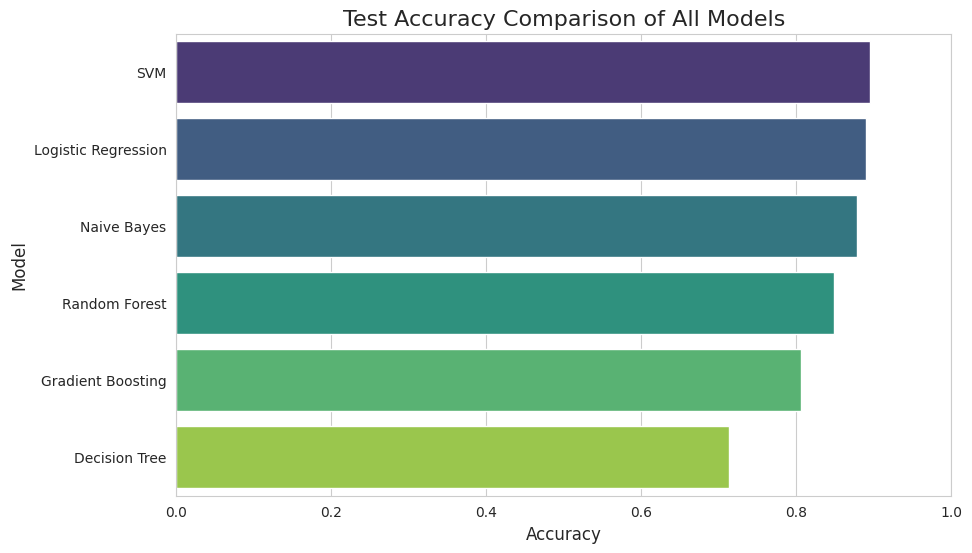

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Collect test accuracies for all models
test_accuracies = {}
for model_name, report in model_reports.items():
    y_pred = report['test_predictions']
    acc = accuracy_score(y_test, y_pred)
    test_accuracies[model_name] = acc

# Create a DataFrame for plotting
df_acc = pd.DataFrame({
    'Model': list(test_accuracies.keys()),
    'Test Accuracy': list(test_accuracies.values())
}).sort_values(by='Test Accuracy', ascending=False)

# Display table
print(df_acc)

# Eye-catching bar chart
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(x='Test Accuracy', y='Model', data=df_acc, palette="viridis")
plt.title("Test Accuracy Comparison of All Models", fontsize=16)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0, 1)
plt.show()

End comparison - this is for comparison between all models,just see the best train and test result and algorithom result ( if do not want to see comparison then ignore it )

In [17]:
# evaluate the model on the train set ( need more time for this )

from sklearn.metrics import accuracy_score

# Chosen model
chosen_model = 'Logistic Regression'

# get the trained model
model = classification_models[chosen_model]

# Predict on train set
y_pred_train = model.predict(X_train_tfidf)

# Calculate train accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy for {chosen_model}: {train_accuracy:.4f}")


Train Accuracy for Logistic Regression: 0.9427


In [19]:
# evaluate the model on the test set ( need more time for this ).
from sklearn.metrics import accuracy_score

# Chosen model
chosen_model = 'Logistic Regression'
y_pred = model_reports[chosen_model]['test_predictions']

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy for {chosen_model}: {test_accuracy:.4f}")

Test Accuracy for Logistic Regression: 0.8904


#" Logistic Regression = 0.8956(test)" gave the best result for this task . so we will continue with "Logistic Regression".

End - Train and evaluate the model on the test set

# End : Step 2 – Model Training

Step 3 – Evaluation<p>

Report:<p>
Accuracy<p>
Precision<p>
Recall<p>
F1-score<p>
Provide confusion matrix visualization.<p>
Save the trained model as a .pkl or .h5 file.<p>
Optimize model parameters for better accuracy<p>

# Start - Step 3 – Evaluation<p>
Report:

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Choose the model
chosen_model = 'Logistic Regression'
model = classification_models[chosen_model]

# Step 2: Predictions
y_pred_train = model.predict(X_train_tfidf)
y_pred_test  = model.predict(X_test_tfidf)

# Step 3: Evaluation Metrics

#  Train Metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
train_report = classification_report(y_train, y_pred_train)
print(f"Train Accuracy for {chosen_model}: {train_accuracy:.4f}\n")
print("Train Classification Report:")
print(train_report)

# Test Metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
test_report = classification_report(y_test, y_pred_test)
print(f"Test Accuracy for {chosen_model}: {test_accuracy:.4f}\n")
print("Test Classification Report:")
print(test_report)



Train Accuracy for Logistic Regression: 0.9427

Train Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9971
           1       0.94      0.95      0.94     10029

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000

Test Accuracy for Logistic Regression: 0.8904

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2529
           1       0.87      0.91      0.89      2471

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



confusion_matrix for train and test

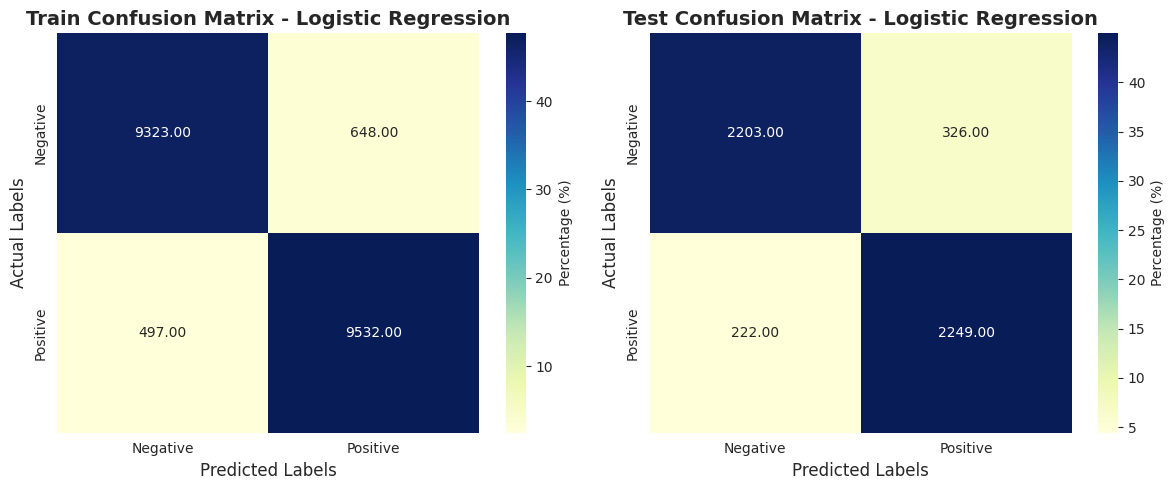

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Choose the model
chosen_model = 'Logistic Regression'

# Get the trained model from your classification_models dictionary
model = classification_models[chosen_model]

# Predictions
y_pred_train = model.predict(X_train_tfidf)
y_pred_test  = model_reports[chosen_model]['test_predictions']

# Confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test  = confusion_matrix(y_test, y_pred_test)

# Convert to percentages for visualization
cm_train_percent = cm_train.astype('float') / cm_train.sum() * 100
cm_test_percent  = cm_test.astype('float') / cm_test.sum() * 100

# Plot side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Train Confusion Matrix
sns.heatmap(cm_train_percent, annot=cm_train, fmt='.2f', cmap='YlGnBu',
            xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'],
            cbar_kws={'label': 'Percentage (%)'}, ax=axes[0])
axes[0].set_xlabel('Predicted Labels', fontsize=12)
axes[0].set_ylabel('Actual Labels', fontsize=12)
axes[0].set_title(f'Train Confusion Matrix - {chosen_model}', fontsize=14, fontweight='bold')

# Test Confusion Matrix
sns.heatmap(cm_test_percent, annot=cm_test, fmt='.2f', cmap='YlGnBu',
            xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'],
            cbar_kws={'label': 'Percentage (%)'}, ax=axes[1])
axes[1].set_xlabel('Predicted Labels', fontsize=12)
axes[1].set_ylabel('Actual Labels', fontsize=12)
axes[1].set_title(f'Test Confusion Matrix - {chosen_model}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Train Accuracy: 0.9956
Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9971
           1       1.00      0.99      1.00     10029

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Test Accuracy: 0.8956
Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2529
           1       0.88      0.91      0.90      2471

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



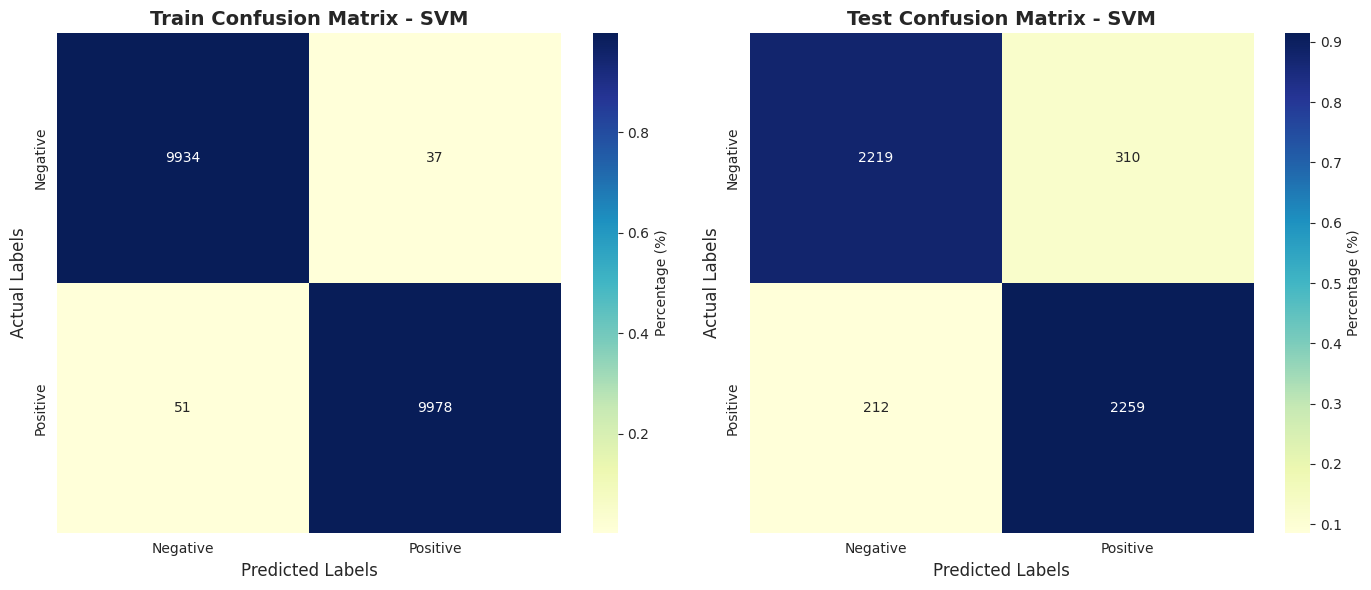

Trained SVM model saved as SVM_model.pkl


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Choose the model
chosen_model = 'SVM' # Updated to SVM based on earlier results

# Get trained model
model = classification_models[chosen_model]

# Predictions
y_pred_train = model.predict(X_train_tfidf)
y_pred_test  = model_reports[chosen_model]['test_predictions']


# Train metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train:.4f}")
print("Train Classification Report:")
print(classification_report(y_train, y_pred_train))

# Test metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy_test:.4f}")
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix Visualization ===
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test  = confusion_matrix(y_test, y_pred_test)

cm_train_percent = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
cm_test_percent  = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Train Confusion Matrix
sns.heatmap(cm_train_percent, annot=cm_train, fmt='d', cmap='YlGnBu',
            xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'],
            cbar_kws={'label': 'Percentage (%)'}, ax=axes[0])
axes[0].set_xlabel('Predicted Labels', fontsize=12)
axes[0].set_ylabel('Actual Labels', fontsize=12)
axes[0].set_title(f'Train Confusion Matrix - {chosen_model}', fontsize=14, fontweight='bold')

# Test Confusion Matrix
sns.heatmap(cm_test_percent, annot=cm_test, fmt='d', cmap='YlGnBu',
            xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'],
            cbar_kws={'label': 'Percentage (%)'}, ax=axes[1])
axes[1].set_xlabel('Predicted Labels', fontsize=12)
axes[1].set_ylabel('Actual Labels', fontsize=12)
axes[1].set_title(f'Test Confusion Matrix - {chosen_model}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#  Save the trained model ===
joblib.dump(model, f"{chosen_model}_model.pkl")
print(f"Trained {chosen_model} model saved as {chosen_model}_model.pkl")

#  Hyperparameter Tuning for Better Accuracy ===
# You can use GridSearchCV to optimize parameters, e.g., C and kernel for SVM
# Example:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C':[0.1,1,10], 'kernel':['linear','rbf']}
# grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
# grid.fit(X_train_tfidf, y_train)
# print(grid.best_params_, grid.best_score_)

In [26]:
import joblib
joblib.dump(model, f"{chosen_model}_model.pkl")
print(f"Trained {chosen_model} model saved as {chosen_model}_model.pkl")


In [30]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib  # Import joblib to load the saved model

# Load the saved model
# Make sure the model file name matches the one saved in the previous step
# For example, if you saved the SVM model as 'SVM_model.pkl'
# model = joblib.load('SVM_model.pkl')

# Initialize the vectorizer with the same parameters used for training
vectorizer = TfidfVectorizer(max_features=60000, ngram_range=(1,2), stop_words='english')

# Fit the vectorizer on the training data (X_train) to build the vocabulary
# This is necessary for the vectorizer to properly transform new text
vectorizer.fit(X_train)  # Make sure X_train is defined and preprocessed

def predict_sentiment(sentence, model, vectorizer):
    # Clean the input sentence using the same cleaning function as used for training data
    cleaned_sentence = clean_text(sentence)  # Make sure clean_text function is defined

    # Transform the cleaned sentence using the fitted vectorizer
    sentence_tfidf = vectorizer.transform([cleaned_sentence])

    # Predict the sentiment
    prediction = model.predict(sentence_tfidf)

    # Map prediction to sentiment label
    sentiment = "Positive" if prediction[0] == 1 else "Negative"  # Assuming 1=Positive, 0=Negative

    # Return sentiment and None for confidence (SVM by default does not provide predict_proba)
    return sentiment, None

# Interactive loop for user input
print("Enter a sentence to predict sentiment (type 'exit' or 'n' to quit):")
while True:
    user_input = input("> ").strip()  # Remove leading/trailing whitespace

    # Exit conditions
    if user_input.lower() in ["exit", "n"]:
        print("Exiting...")
        break

    # Check if input is empty
    if user_input == "":
        print("No input detected. Please type a sentence or 'n'/'exit' to quit.\n")
        continue

    # Predict sentiment
    sentiment, confidence = predict_sentiment(user_input, model, vectorizer)

    if confidence is not None:
        print(f"Sentiment: {sentiment}, Confidence: {confidence:.4f}\n")
    else:
        print(f"Sentiment: {sentiment}\n")

Enter a sentence to predict sentiment (type 'exit' or 'n' to quit):
> I did not enjoy the film Eraser whatsoever. It's awful acting, boring storyline and average special effects made this an annoying arnie film, as it had a mountain of potential. With other action films of the time Eraser fell very short!!!
Sentiment: Negative

> I think this film version of NORTHANGER ABBEY is actually quite good. It certainly is amusing. Well, it's not a masterpiece as PRIDE AND PREJUDICE ('95) but there's very good stuff in it.. especially the City of Bath setting!!! ..The Royal Crescent, the Roman Baths, the fascinating Georgian atmosphere.. That is excellent. If you are a Bath fan like myself, you'll love watching this film! The performances may sound a bit too "melodramatic" but I've got the impression that this film, like the novel itself, is deliberately making fun of the popular tales of romance and terror and of the society of the period. The only drawback is probably the female lead as I per

In [ ]:
# Demo: Predict sentiment for user input
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Load model and vectorizer
with open('SVM_model.pkl', 'rb') as f:
    model = pickle.load(f)

# You may need to load the vectorizer if saved separately. Otherwise, fit on train data as in notebook.
# For demo, let's fit a new vectorizer on cleaned data (replace with your actual vectorizer for best results)
df = pd.read_csv('used as train_data (1)_Cleaned.csv')
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'].astype(str))

user_input = input('Enter a sentence for sentiment prediction: ')
cleaned = clean_text(user_input)
features = vectorizer.transform([cleaned])
prediction = model.predict(features)
print('Predicted Sentiment:', prediction[0])